# Assignment 1 - Machine Learning

#### Names...

Setting up the data and importing most important packages


In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb


In [4]:
red_data = pd.read_csv("winequality-red.csv", sep=";")
white_data = pd.read_csv("winequality-white.csv", sep=";")


In [7]:
red_data.sample(10)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
916,5.3,0.715,0.19,1.5,0.161,7.0,62.0,0.99395,3.62,0.61,11.0,5
1472,7.6,0.350,0.60,2.6,0.073,23.0,44.0,0.99656,3.38,0.79,11.1,6
1266,7.2,0.570,0.05,2.3,0.081,16.0,36.0,0.99564,3.38,0.60,10.3,6
1289,7.0,0.600,0.30,4.5,0.068,20.0,110.0,0.99914,3.30,1.17,10.2,5
227,9.0,0.820,0.14,2.6,0.089,9.0,23.0,0.99840,3.39,0.63,9.8,5
760,9.0,0.580,0.25,2.8,0.075,9.0,104.0,0.99779,3.23,0.57,9.7,5
272,10.9,0.370,0.58,4.0,0.071,17.0,65.0,0.99935,3.22,0.78,10.1,5
384,7.7,0.510,0.28,2.1,0.087,23.0,54.0,0.99800,3.42,0.74,9.2,5
617,11.5,0.310,0.51,2.2,0.079,14.0,28.0,0.99820,3.03,0.93,9.8,6
1290,7.6,0.740,0.00,1.9,0.100,6.0,12.0,0.99521,3.36,0.59,11.0,5


# 1

## 1.1


In [10]:
# Fix for correct dtypes for some columns
columns_dtype_change = ["free sulfur dioxide", "total sulfur dioxide"]

red_data[columns_dtype_change] = red_data[columns_dtype_change].astype(int)
white_data[columns_dtype_change] = white_data[columns_dtype_change].astype(int)


## 1.2


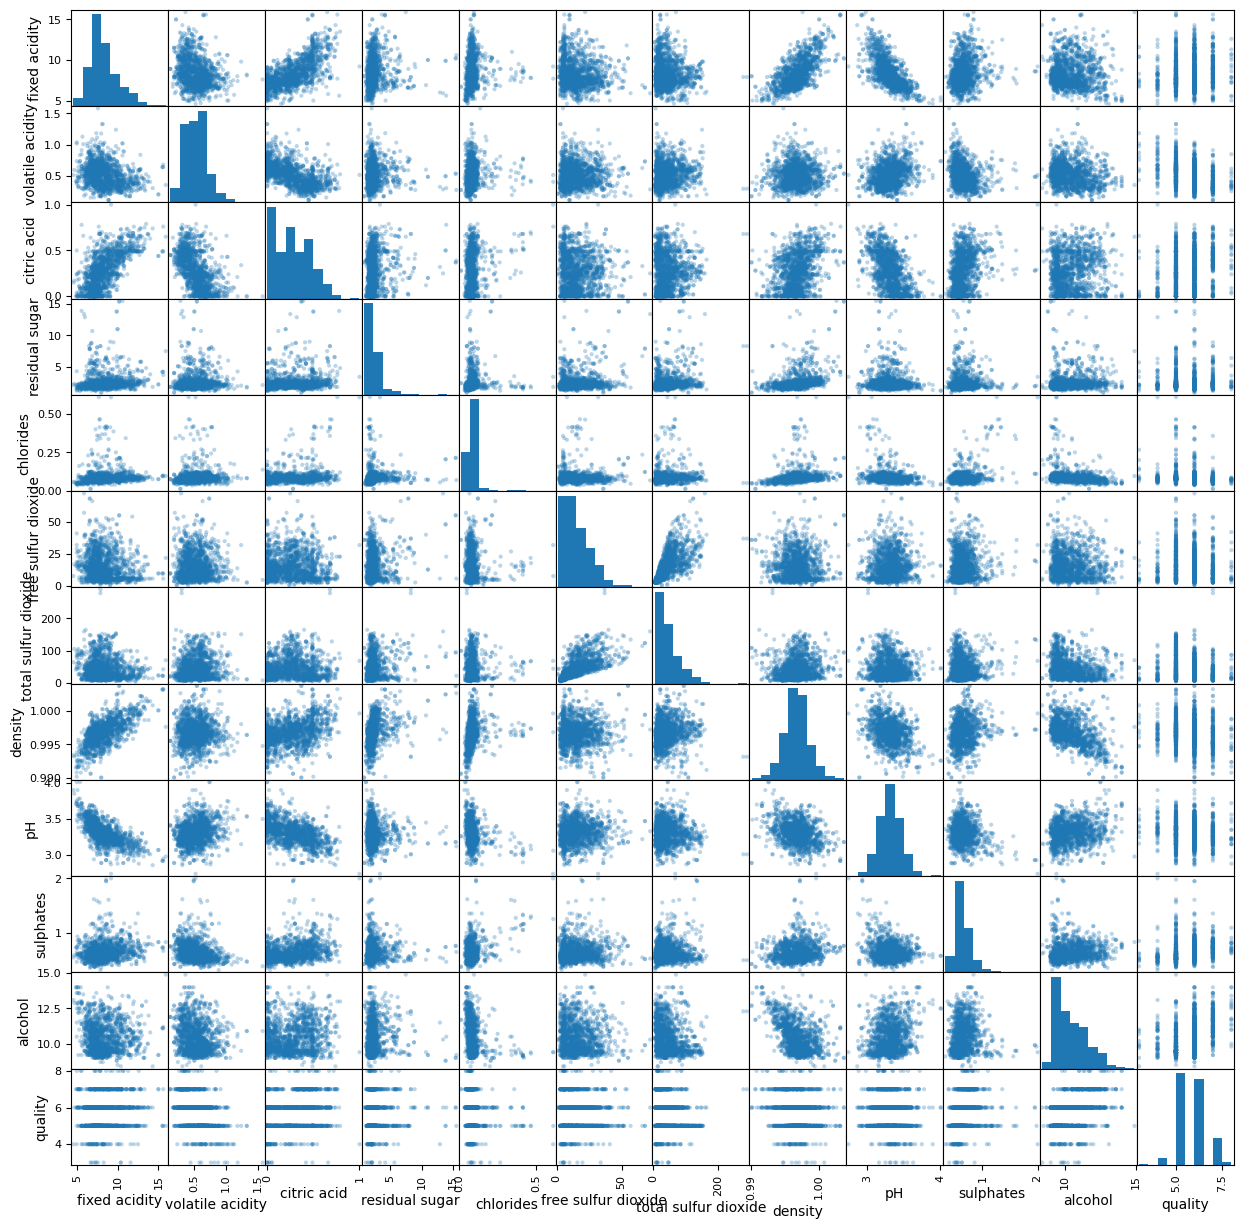

In [46]:
_ = pd.plotting.scatter_matrix(red_data, figsize=(15, 15), alpha=0.3)


[Text(0.5, 1.0, '(absolute) Correlation Matrix Red Wine')]

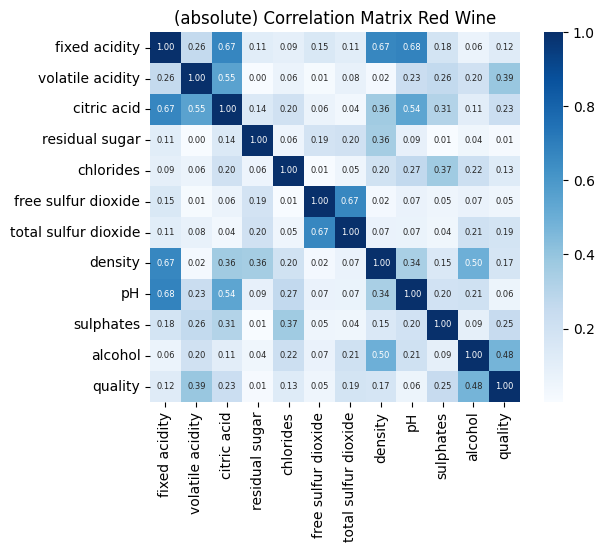

In [62]:
# For our purposes we use the absolute value of the correlation matrix.
# Because we do not care of the direction of correlation, but rather the strength.
corr_red = abs(red_data.corr())
sb.heatmap(
    corr_red,
    cmap="Blues",
    square=True,
    annot=True,
    annot_kws={"fontsize": 6},
    fmt=".2f",
).set(title="(absolute) Correlation Matrix Red Wine")


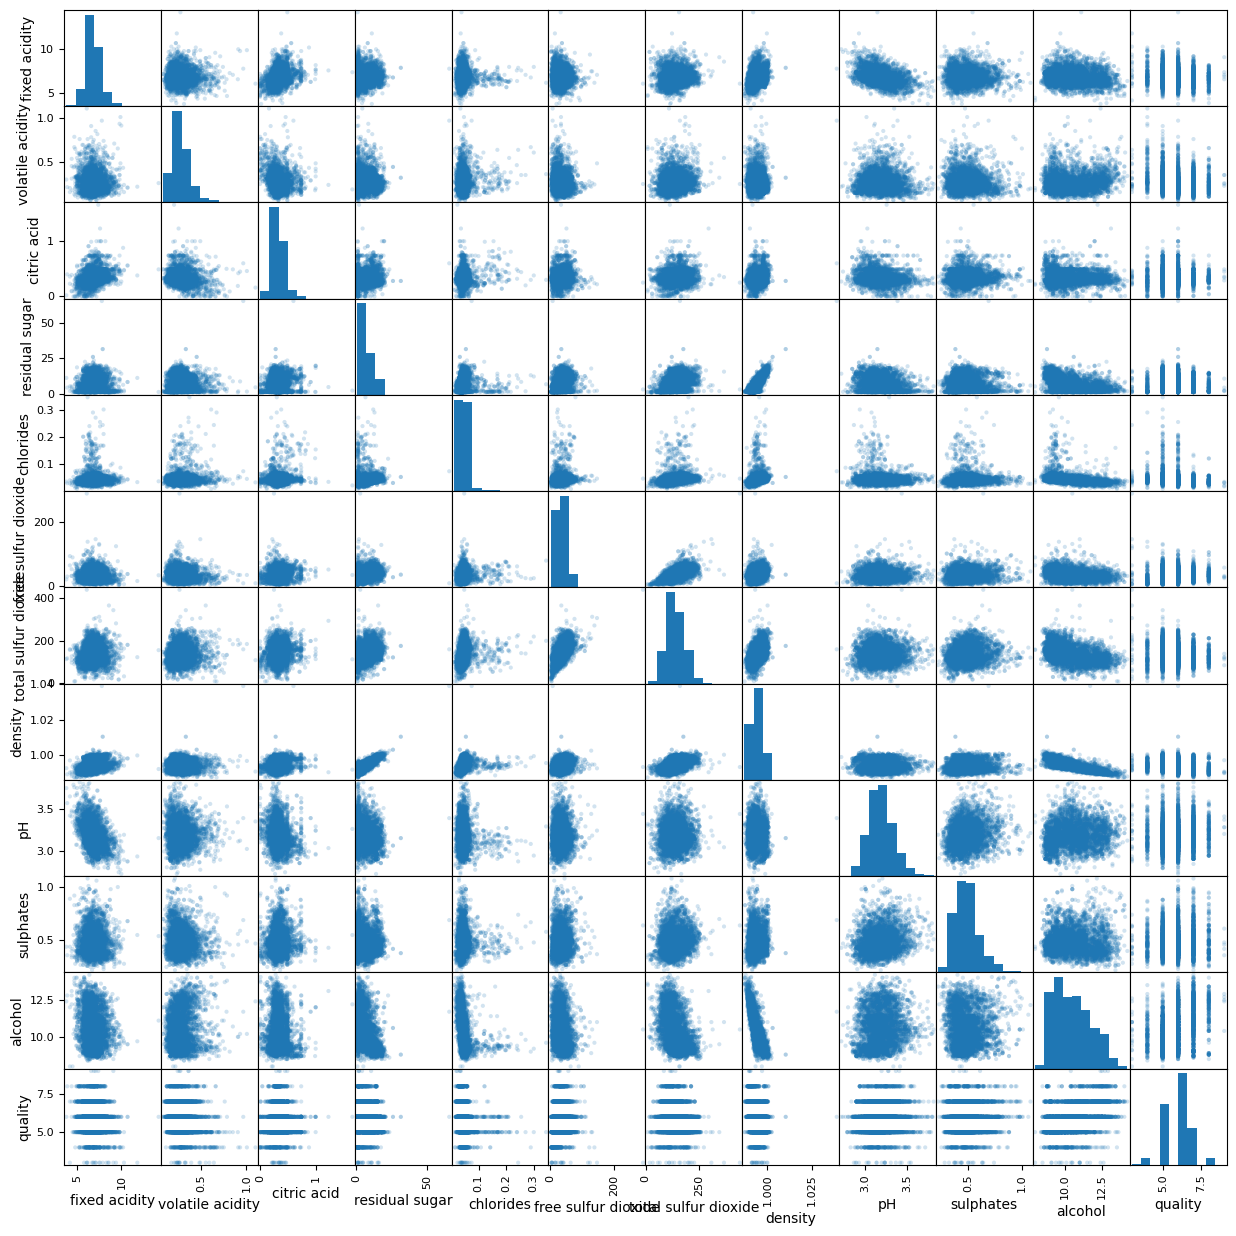

In [45]:
_ = pd.plotting.scatter_matrix(white_data, figsize=(15, 15), alpha=0.3)


<AxesSubplot: >

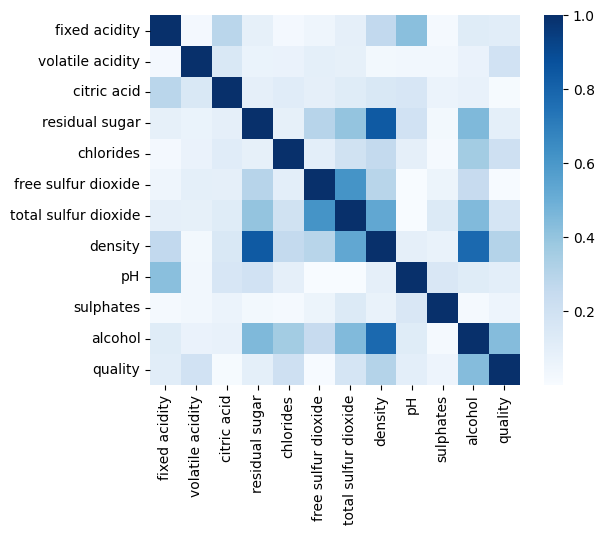

In [52]:
corr_white = abs(white_data.corr())
sb.heatmap(corr_white, cmap="Blues", square=True)


# 2

## 2.1, 2.2, 2.3


In [71]:
# 2.1
from sklearn.datasets import make_regression

X_reg, y_reg, coeffs = make_regression(coef=True, random_state=2)

# 2.2
beta_ols = np.linalg.inv(X_reg.T @ X_reg) @ X_reg.T @ y_reg


In [77]:
# 2.3
# How many coefficents differ by more than 0.0000000001 units by using ordinary least square method.
abs(np.isclose(beta_ols, coeffs, atol=1e-10).sum() - len(beta_ols))


0

# 3

## 3.1


In [80]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from typing import Tuple, Union

ModelRegressor = Union[LinearRegression, Ridge, Lasso, ElasticNet]


def get_all_scores(pred: np.array, y_true: np.array, model_name: str) -> None:
    """Prints a nicely formatted table with loss from the model predictions."""
    mae = mean_absolute_error(y_true, pred)
    msq = mean_squared_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"{model_name:^27}")
    print("*" * 27)
    print(f"{'Method':<19}| Result")
    print("—" * 27)
    print(f"{'Rˆ2':<19}| {r2:.4f}")
    print(f"{'Mean Absolute Error':<19}| {mae:.4f}")
    print(f"{'Mean Squared Error':<19}| {msq:.4f}")


def fit_and_test_model(
    model: ModelRegressor,
    X_train_data: np.array,
    X_test_data: np.array,
    y_train_data: np.array,
    y_test_data: np.array,
    print_result: bool = False,
    model_name: str = "",
) -> Tuple[ModelRegressor, np.array]:
    model.fit(X_train_data, y_train_data)
    pred = model.predict(X_test_data)
    if print_result:
        get_all_scores(pred=pred, y_true=y_test_data, model_name=model_name)
    return model, pred


In [252]:
from sklearn.model_selection import train_test_split, GridSearchCV

# Get the data X_w, y_w <=> white wine dataset and X_r, y_r <=> red wine dataset
X_w_train, X_w_test, y_w_train, y_w_test = train_test_split(
    white_data.drop(["quality"], axis=1), white_data["quality"], random_state=100
)
white_data_dictionary = {
    "X_train_data": X_w_train,
    "X_test_data": X_w_test,
    "y_train_data": y_w_train,
    "y_test_data": y_w_test,
}

X_r_train, X_r_test, y_r_train, y_r_test = train_test_split(
    red_data.drop(["quality"], axis=1), red_data["quality"], random_state=100
)
red_data_dictionary = {
    "X_train_data": X_r_train,
    "X_test_data": X_r_test,
    "y_train_data": y_r_train,
    "y_test_data": y_r_test,
}


In [264]:
def do_exercise(type_of_wine: str = "white"):
    if type_of_wine.startswith(("w", "W")):
        data_to_use = white_data_dictionary
        wine_type = "White"
    elif type_of_wine.startswith(("r", "R")):
        data_to_use = red_data_dictionary
        wine_type = "Red"
    else:
        raise ValueError

    figure, axis = plt.subplots(2, 2)

    # Ordinary Least Square
    lr = LinearRegression(n_jobs=-1)
    fit_and_test_model(
        lr, print_result=True, model_name="Ordinary Linear Regression", **data_to_use
    )

    # Ridge grid search for interval alpha in [0.0001, 100]
    parameter = {"alpha": np.logspace(-4, 2, num=100)}
    ridge_grid = GridSearchCV(
        Ridge(), param_grid=parameter, return_train_score=True, n_jobs=-1
    )
    ridge_grid.fit(data_to_use["X_train_data"], data_to_use["y_train_data"])
    ridge = Ridge(**ridge_grid.best_params_)
    fit_and_test_model(
        ridge,
        print_result=True,
        model_name=f"Ridge - alpha={ridge_grid.best_params_['alpha']:.3f}",
        **data_to_use,
    )
    _ = pd.DataFrame(ridge_grid.cv_results_).plot(
        x="param_alpha",
        y=["mean_test_score", "mean_train_score"],
        logx=True,
        ax=axis[0, 0],
    )
    axis[0, 0].set_title("Ridge Score w.r.t alpha")

    # Lasso grid serach with same interval as ridge
    lasso_grid = GridSearchCV(
        Lasso(), param_grid=parameter, return_train_score=True, n_jobs=-1
    )
    lasso_grid.fit(data_to_use["X_train_data"], data_to_use["y_train_data"])
    lasso = Lasso(**lasso_grid.best_params_)
    fit_and_test_model(
        lasso,
        print_result=True,
        model_name=f"Lasso - alpha={lasso_grid.best_params_['alpha']:.3f}",
        **data_to_use,
    )
    _ = pd.DataFrame(lasso_grid.cv_results_).plot(
        x="param_alpha",
        y=["mean_test_score", "mean_train_score"],
        logx=True,
        ax=axis[0, 1],
    )
    axis[0, 1].set_title("Lasso Scores w.r.t. alpha")

    # Elastic Net grid search with same alpha, and l1_ration in interval [0,1]
    parameter["l1_ratio"] = np.linspace(1e-5, 1, num=25)
    elastic_grid = GridSearchCV(
        ElasticNet(), param_grid=parameter, return_train_score=True, n_jobs=-1
    )
    elastic_grid.fit(data_to_use["X_train_data"], data_to_use["y_train_data"])
    elastic = ElasticNet(**elastic_grid.best_params_)
    fit_and_test_model(
        elastic,
        print_result=True,
        model_name=f"ElasticNet - alpha={elastic_grid.best_params_['alpha']:.3f} - l1_ratio={elastic_grid.best_params_['l1_ratio']:.3f}",
        **data_to_use,
    )
    grid_results = pd.DataFrame(elastic_grid.cv_results_)[
        ["param_alpha", "param_l1_ratio", "mean_test_score", "mean_train_score"]
    ].to_numpy()

    # Normal line plot will not work with two variables, we will use contour plot
    countor = axis[1, 0].tricontour(
        grid_results[:, 0].astype(float),
        grid_results[:, 1].astype(float),
        grid_results[:, 2].astype(float),
        levels=300,
        cmap="Greens",
    )
    axis[1, 0].set_xscale("log")
    axis[1, 0].set_yscale("log")
    axis[1, 0].set_title("ElasticNet Score Contour Plot of Test Score")
    figure.colorbar(countor)
    countor = axis[1, 1].tricontour(
        grid_results[:, 0].astype(float),
        grid_results[:, 1].astype(float),
        grid_results[:, 3].astype(float),
        levels=300,
        cmap="Greens",
    )
    axis[1, 1].set_xscale("log")
    # axis[1,1].set_yscale('log')
    axis[1, 1].set_title("ElasticNet Score Contour Plot of Train Score")
    figure.colorbar(countor)
    axis[1, 0].set_xlabel("param alpha")
    axis[1, 1].set_xlabel("param alpha")
    axis[1, 0].set_ylabel("param l1_ratio")
    axis[1, 1].set_ylabel("param l1_ratio")
    figure.set_size_inches(20, 10)
    figure.suptitle(f"Grid Search Curves for {wine_type} wine dataset", fontsize=20)


Ordinary Linear Regression 
***************************
Method             | Result
———————————————————————————
Rˆ2                | 0.3293
Mean Absolute Error| 0.5001
Mean Squared Error | 0.4237
    Ridge - alpha=0.870    
***************************
Method             | Result
———————————————————————————
Rˆ2                | 0.3254
Mean Absolute Error| 0.5009
Mean Squared Error | 0.4262
    Lasso - alpha=0.001    
***************************
Method             | Result
———————————————————————————
Rˆ2                | 0.3260
Mean Absolute Error| 0.5006
Mean Squared Error | 0.4258
ElasticNet - alpha=0.001 - l1_ratio=0.000
***************************
Method             | Result
———————————————————————————
Rˆ2                | 0.3245
Mean Absolute Error| 0.5013
Mean Squared Error | 0.4268


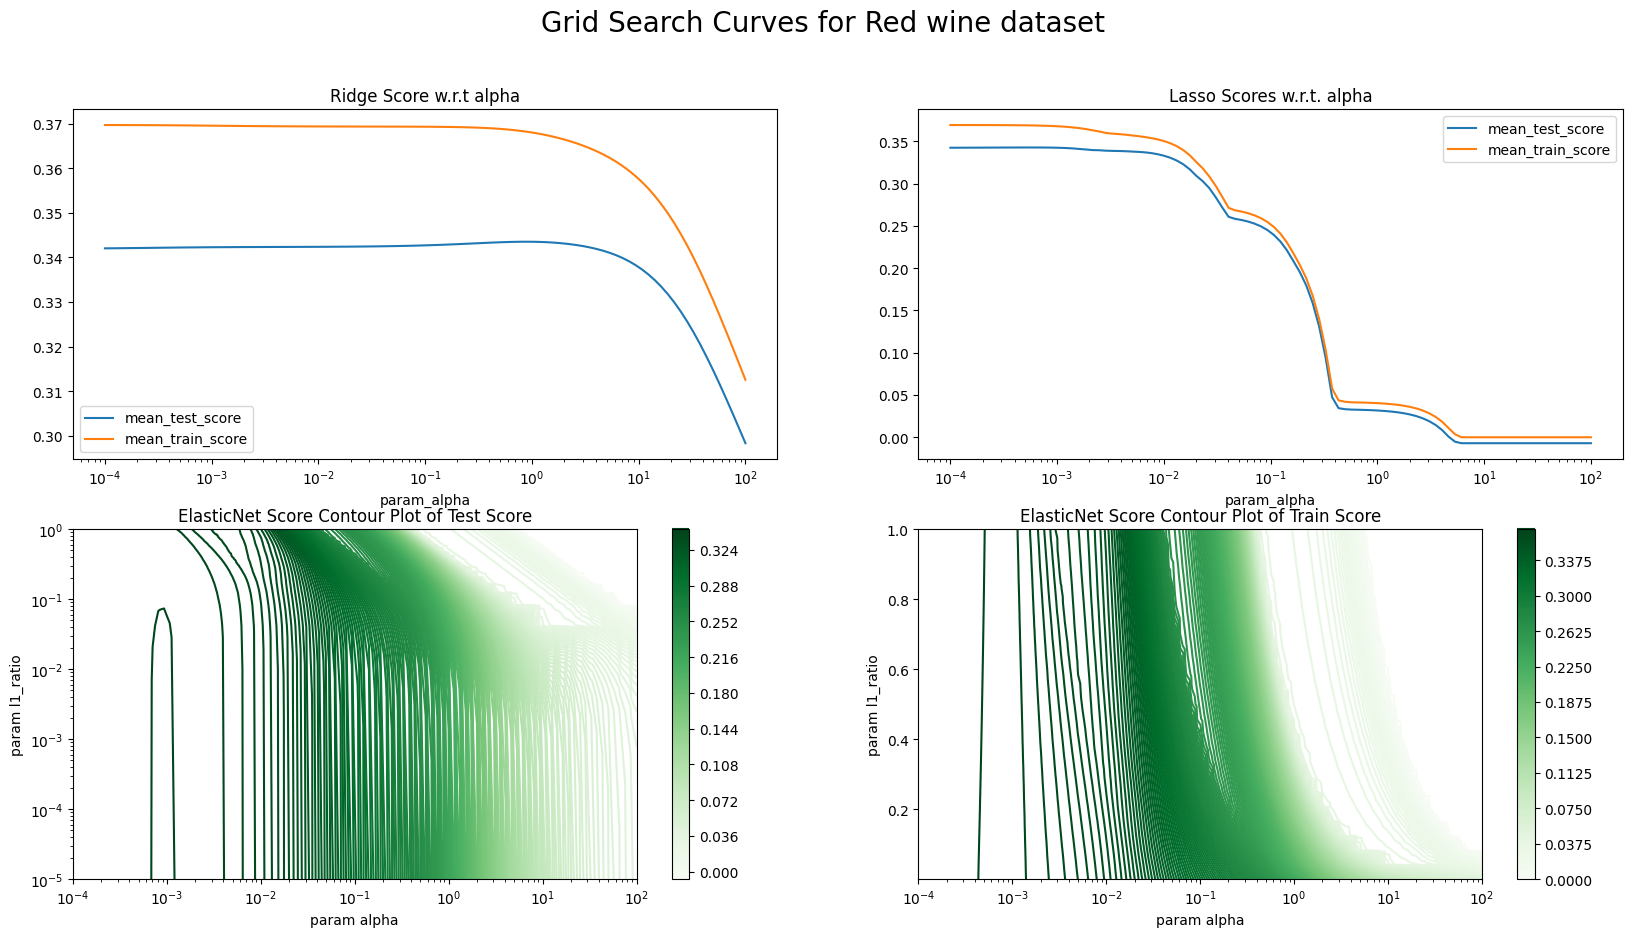

In [265]:
do_exercise("red")


Ordinary Linear Regression 
***************************
Method             | Result
———————————————————————————
Rˆ2                | 0.2539
Mean Absolute Error| 0.5807
Mean Squared Error | 0.5755
    Ridge - alpha=0.000    
***************************
Method             | Result
———————————————————————————
Rˆ2                | 0.2540
Mean Absolute Error| 0.5804
Mean Squared Error | 0.5755
    Lasso - alpha=0.000    
***************************
Method             | Result
———————————————————————————
Rˆ2                | 0.2488
Mean Absolute Error| 0.5826
Mean Squared Error | 0.5795
ElasticNet - alpha=0.000 - l1_ratio=0.000
***************************
Method             | Result
———————————————————————————
Rˆ2                | 0.2487
Mean Absolute Error| 0.5826
Mean Squared Error | 0.5796


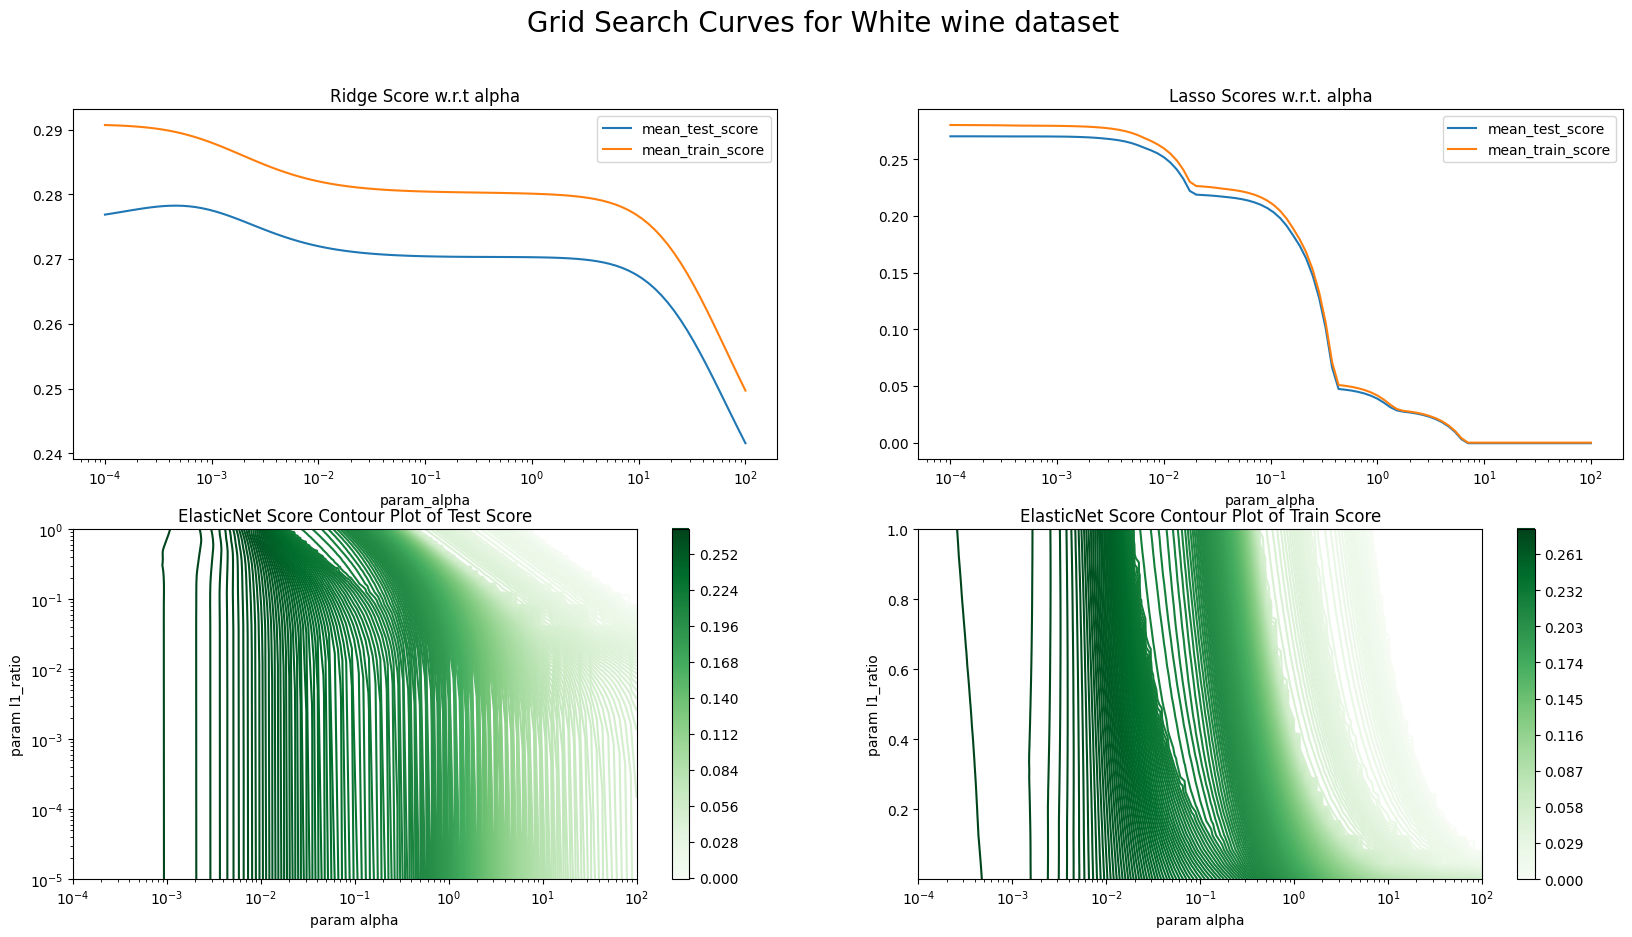

In [266]:
do_exercise("white")
